In [1]:
%matplotlib inline


# Multi-instrument joint analysis


## Introduction


We are goind to reproduce the analysis of the public Crab datasets from [Nigro et al. 2019](https://www.aanda.org/articles/aa/full_html/2019/05/aa34938-18/aa34938-18.html). \
In practice, we have to:

- Read a DL4 datasets file
- Define the `~gammapy.modeling.models.Models` to apply to the datasets from a list of `~gammapy.modeling.models.SkyModel`.
- Create a `~gammapy.modeling.Fit` object and run it to fit the model parameters
- Plot the spectrum obtained from the joint fit together with the ones obtained for each instrument fit in their respective validity range.



In [2]:
from IPython.display import display

from pathlib import Path

import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt

from gammapy.datasets import Datasets

from gammapy.modeling import Fit
from gammapy.modeling.models import Models



## Define models

In [5]:
target_postion = SkyCoord.from_name("Crab Nebula")
spatial_model = PointSpatialModel.from_position(target_postion)
spatial_model.freeze() # frozen for 1D analysis

# we can set some limit on the parameters
# for example on the source position
shift_max = 0.2 
spatial_model.lon_0.max = spatial_model.lon_0.value + shift_max
spatial_model.lon_0.min = spatial_model.lon_0.value - shift_max
spatial_model.lat_0.max = spatial_model.lat_0.value + shift_max
spatial_model.lat_0.min = spatial_model.lat_0.value - shift_max

spectral_model = LogParabolaSpectralModel(
    amplitude=1e-12 * u.Unit("cm-2 s-1 TeV-1"),
    index=2.,
    beta=0.,
    reference=1 * u.TeV,
)
model = SkyModel(spatial_model=spatial_model, spectral_model=spectral_model, name="crab")
#model = SkyModel(spectral_model=spectral_model, name="crab")

models = Models([model])


Models can be saved to file :

In [6]:
path = Path("models")
path.mkdir(exist_ok=True)

filename = path / "models_crab.yaml"
models.write(filename, overwrite=True)

Alternatively you can read the models from file 

In [7]:
filename = path / "models_crab.yaml"
models = Models.read(filename)

In [8]:
models[0].spectral_model

<Axes: xlabel='Energy [$\\mathrm{TeV}$]', ylabel='dnde [$\\mathrm{TeV^{-1}\\,s^{-1}\\,cm^{-2}}$]'>

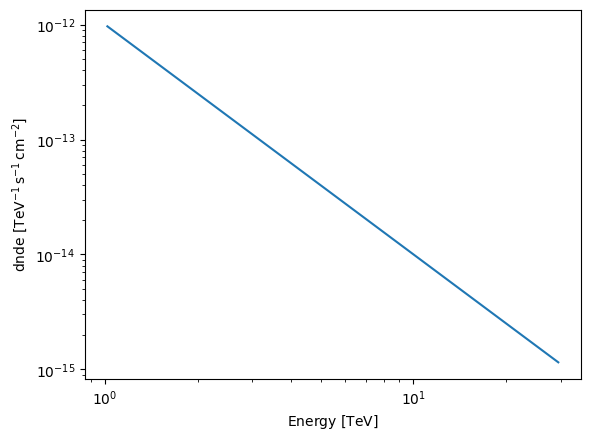

In [9]:
models[0].spectral_model.plot([1, 30]*u.TeV)

## Read the datasets

We read all the public datasets from the Crab and attach them the models

# Joint fit

Define the fit instance

Let's start to fit the data from each instrument indepently

Think about how to determine the energy range for each dataset!

Save the results for each instrument into a dictionary

Now we do the joint fit

and compare the results by plotting them all together

## Likelihood contours

In order to compute likelihhod contours of the fitted parameters 
we copy some code from the documentation https://docs.gammapy.org/1.2/tutorials/api/fitting.html#computing-contours-using-stat-contour

and we apply use it with our datasets and the previous fit results